In [1]:
import kwant
import numpy as np
import tinyarray as tiny
from types import SimpleNamespace
import scipy.sparse.linalg as la
from matplotlib import pyplot as plt
import holoviews as hv
hv.extension('matplotlib', logo=False) #BOKEH DOESNT SUPPORT LATEX IN LABELS
from holoviews import opts
hv.output(fig='svg')

# define the Pauli matrices
s_0 = np.identity(2)
s_z = np.array([[1, 0], [0, -1]])
s_x = np.array([[0, 1], [1, 0]])
s_y = np.array([[0, -1j], [1j, 0]])
# pauli = [sx,sy,sz] #pauli = {'x':sx, 'y':sy, 'z':sz} #as dictionary

C:\ProgramData\Anaconda3\envs\lps\lib\site-packages\kwant\solvers\default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


$$H = \frac{-\hbar^2}{2m}\nabla^2 - i\alpha(\delta_x \sigma_x - \delta_y \sigma_x) + B_z\sigma_z$$

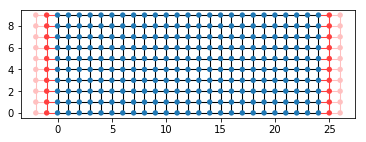

In [46]:
def onsite(position, t, e_z):
    return 4 * t * s_0 + e_z * s_z

def hopping(position1,position2, t, alpha):
    return -t * s_0 + 1j * alpha * s_y / 2

t=1
L=25
W=10
syst = kwant.Builder()
lat = kwant.lattice.square()

syst[(lat(x, y) for x in range(L) for y in range(W))] = onsite
# hoppings in x-direction
syst[kwant.builder.HoppingKind((1, 0), lat, lat)] = hopping
# hoppings in y-directions
syst[kwant.builder.HoppingKind((0, 1), lat, lat)] = hopping

sym_lead = kwant.TranslationalSymmetry((-1,0))
lead=kwant.Builder(sym_lead)

lead[(lat(0, j) for j in range(W))] = onsite
# hoppings in x-direction
lead[kwant.builder.HoppingKind((1, 0), lat, lat)] = hopping
# hoppings in y-directions
lead[kwant.builder.HoppingKind((0, 1), lat, lat)] = hopping

syst.attach_lead(lead)
syst.attach_lead(lead.reversed())

kwant.plot(syst)

syst = syst.finalized()

In [47]:
energies = np.linspace(0,1,75)-0.2
T = []
pars= dict(e_z=0.1, t=1, alpha=0.5)
for energy in energies:
    smatrix = kwant.smatrix(syst, energy, params=pars)
    T.append(smatrix.transmission(1,0))

In [48]:
dims = SimpleNamespace(energy='E', transmission = 'T')
hv.Path((energies,T),kdims=[dims.energy, dims.transmission])

:Path   [E,T]